In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

**Reading CSV with mental disorder and other things responsible for mental health persentage of both gender from 1990 to 2019 for 228 countries**

In [103]:
df1=pd.read_csv("mental-and-substance-use-as-share-of-disease.csv")
df2=pd.read_csv("prevalence-by-mental-and-substance-use-disorder (2).csv")

In [104]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [105]:
df2.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


**Merging 2 dataset to make it one**

In [106]:
data=pd.merge(df2,df1)
data.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


**Calculating number of null values**

In [107]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [108]:
data=data.drop("Code",axis=1)

In [109]:
data.shape

(6840, 10)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Year                                                                                             6840 non-null   int64  
 2   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 3   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                      6840 non-null   float64
 4   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                      6840 non-null   float64
 5   Preval

In [111]:
data=data.set_axis(['Country','Year','Schizophrenia','Bipolar disorder','eating disorder','Anxity','Drug usage','Depression','Alcohol','Mental fitness'], axis="columns")

**Calculating Number of countries in dataset**

In [112]:
data["Country"].value_counts()

Afghanistan         30
Northern Ireland    30
Norway              30
OECD Countries      30
Oman                30
                    ..
Guam                30
Guatemala           30
Guinea              30
Guinea-Bissau       30
Zimbabwe            30
Name: Country, Length: 228, dtype: int64

**Data Visualization**

C:\Users\susmi\AppData\Local\Temp\ipykernel_20828\1364584190.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap="Reds")


[]

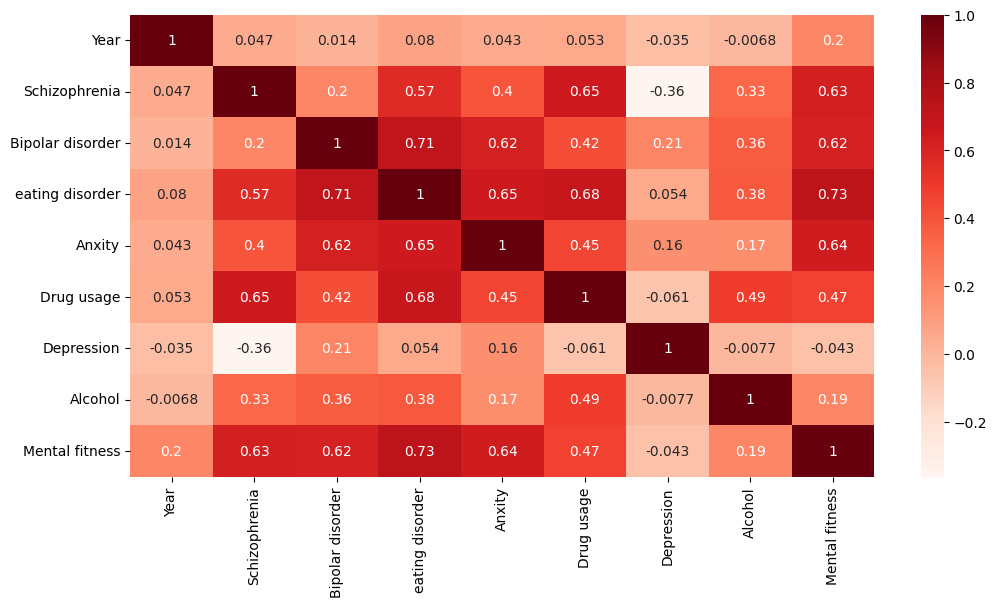

In [113]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True, cmap="Reds")
plt.plot()

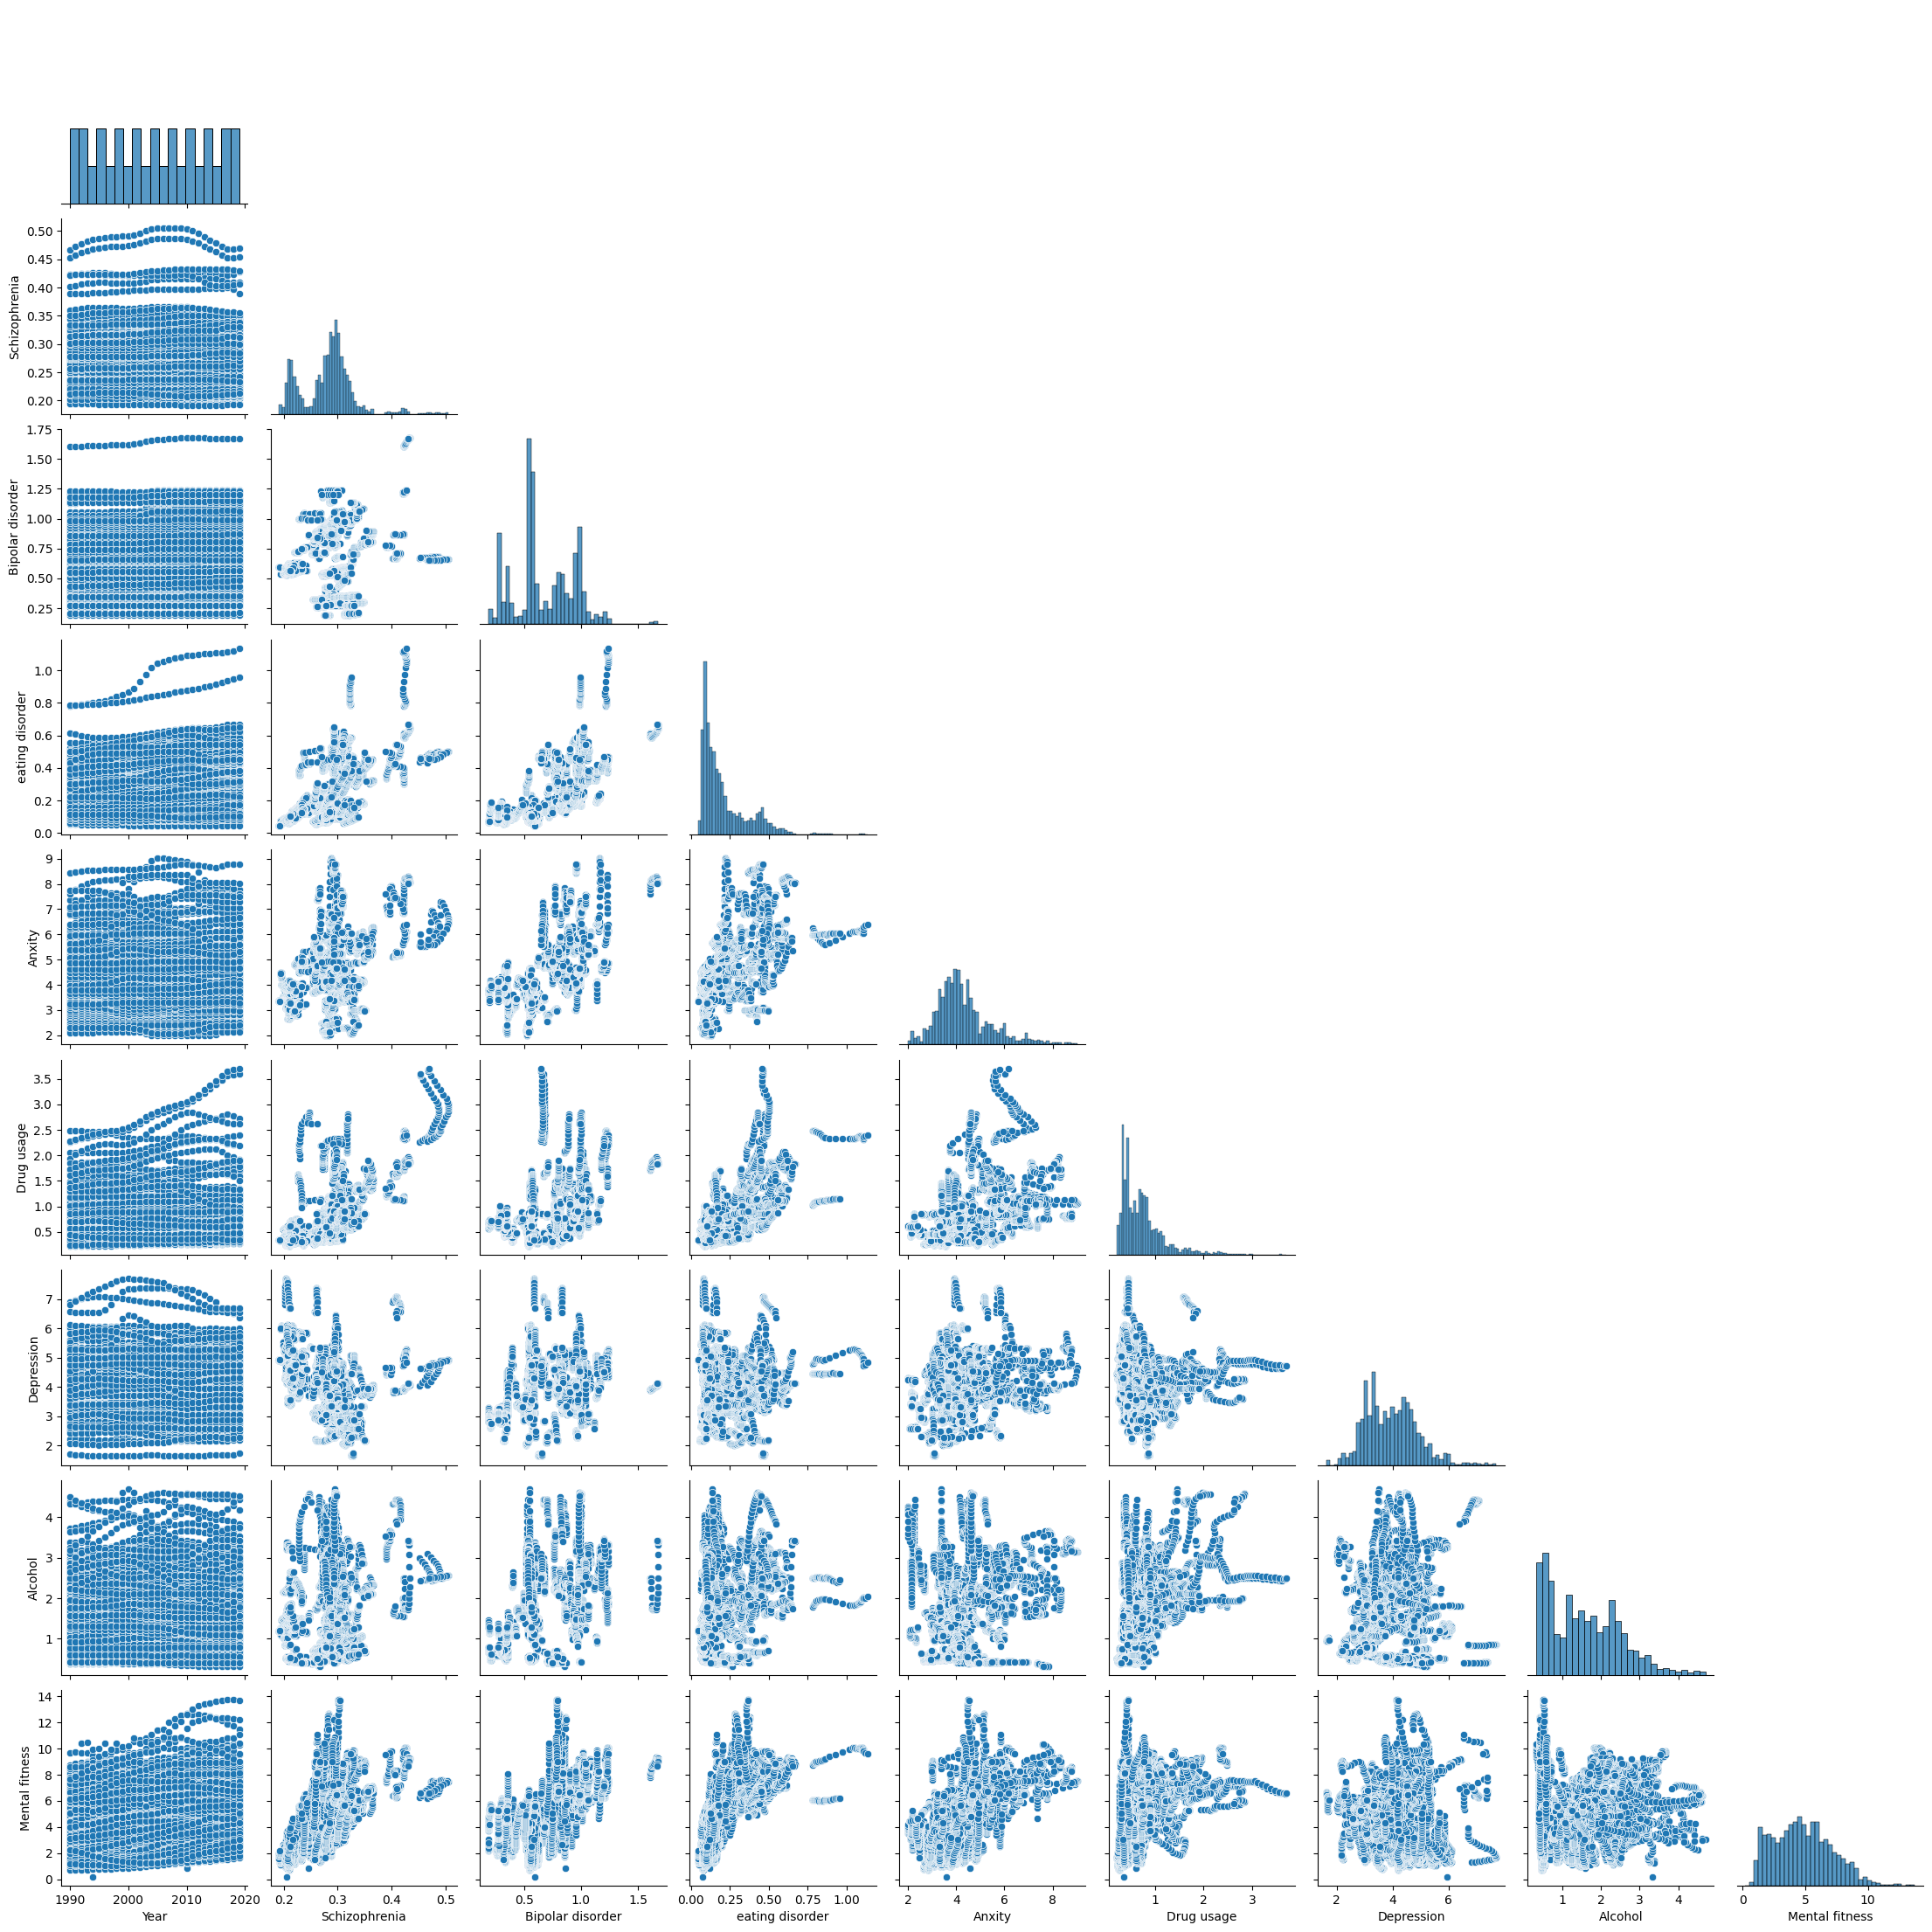

In [114]:
sns.pairplot(data, corner=True)
plt.show()

**Feature selection and Spliting dataset into train and test**

In [115]:
X=data.drop(["Mental fitness","Country","Year"],axis=1)
Y=data["Mental fitness"]
scaler=StandardScaler()
x=scaler.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

**Training Various Regression model**

In [116]:
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
param={'n_estimators':1,'max_depth':3,'learning_rate':1,'criterion':'mse'}
model1=GradientBoostingRegressor(**param)
model1.fit(X_train,Y_train)
Y_pred1=model1.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred1)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_pred1)))
r2=r2_score(Y_test,Y_pred1)
print("MSE=",mse,"RMSE=",rmse,"R2 Score=",r2)

MSE= 1.4014673961511517 RMSE= 1.1838358822704909 R2 Score= 0.7244819361453825


c:\Users\susmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\susmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [118]:
model2=ElasticNet(alpha=1.0, l1_ratio=0.5)
model2.fit(X_train,Y_train)
Y_pred2=model2.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred2)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_pred2)))
r2=r2_score(Y_test,Y_pred2)
print("MSE=",mse,"RMSE=",rmse,"R2 Score=",r2)

MSE= 3.429191128382783 RMSE= 1.8518075300588837 R2 Score= 0.3258465356567197


In [119]:
model3=SGDRegressor()
model3.fit(X_train,Y_train)
Y_pred3=model3.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred3)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_pred3)))
r2=r2_score(Y_test,Y_pred3)
print("MSE=",mse,"RMSE=",rmse,"R2 Score=",r2)

MSE= 1.9045687005550684 RMSE= 1.3800611220359293 R2 Score= 0.6255759625260363


In [120]:
model4=SVR()
model4.fit(X_train,Y_train)
Y_pred4=model4.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred4)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_pred4)))
r2=r2_score(Y_test,Y_pred4)
print("MSE=",mse,"RMSE=",rmse,"R2 Score=",r2)

MSE= 1.4747595551004329 RMSE= 1.2143967865160188 R2 Score= 0.7100732429535982


In [121]:
model5=LinearRegression()
model5.fit(X_train,Y_train)
Y_pred5=model5.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred5)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_pred5)))
r2=r2_score(Y_test,Y_pred5)
print("MSE=",mse,"RMSE=",rmse,"R2 Score=",r2)

MSE= 1.5061725461484337 RMSE= 1.2272622157258952 R2 Score= 0.7038976826107772


In [122]:
model6=RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)
model6.fit(X_train,Y_train)
Y_pred6=model5.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred6)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_pred6)))
r2=r2_score(Y_test,Y_pred6)
print("MSE=",mse,"RMSE=",rmse,"R2 Score=",r2)

MSE= 1.5061725461484337 RMSE= 1.2272622157258952 R2 Score= 0.7038976826107772
